# Chapter 10
## Introduction to Artificial Neural Networks with Keras

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)
X=iris.data[["petal length (cm)", "petal width (cm)"]].values
y=(iris.target==0)

In [3]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

,"penalty penalty: {'l2','l1','elasticnet'}, default=NoneThe penalty (aka regularization term) to be used.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term if regularization isused.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.`l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.Only used if `penalty='elasticnet'`... versionadded:: 0.24",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, the iterations will stopwhen (loss > previous_loss - tol)... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.",0
,"eta0 eta0: float, default=1Constant by which the updates are multiplied.",1.0
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"random_state random_state: int, RandomState instance or None, default=0Used to shuffle the training data, when ``shuffle`` is set to``True``. Pass an int for reproducible output across multiplefunction calls.See :term:`Glossary `.",42


In [4]:
X_new = [[2,0.5], [3,1]]

In [5]:
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [43]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [9]:
mlp_reg = MLPRegressor(hidden_layer_sizes = [50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred)

In [10]:
import math

In [11]:
math.sqrt(rmse)

0.5053326657968523

In [12]:
import tensorflow as tf

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [15]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [16]:
X_train.shape

(55000, 28, 28)

In [17]:
X_train.dtype

dtype('uint8')

In [18]:
X_train, X_valid, X_test = X_train/225. , X_valid/225. , X_test/225.

In [19]:
class_names = ["T-shit/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
class_names[y_train[0]]

'Ankle boot'

In [21]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [24]:
hidden1 = model.layers[1]

In [25]:
hidden1.name

'dense'

In [26]:
model.get_layer('dense') is hidden1

True

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[ 0.03153434,  0.02084852,  0.0047298 , ..., -0.00368702,
        -0.00598384,  0.04906368],
       [-0.02641129, -0.00734684, -0.07048541, ..., -0.02089688,
         0.04644942,  0.02397503],
       [ 0.05503027, -0.03198238,  0.07039905, ..., -0.06442807,
         0.03651194,  0.02187213],
       ...,
       [-0.00350454, -0.05119817, -0.03090452, ..., -0.01817751,
         0.07358414,  0.06638026],
       [-0.03546338, -0.03213736, -0.01333519, ..., -0.00584068,
        -0.04161911, -0.04637478],
       [ 0.0093013 ,  0.02953388, -0.0702962 , ...,  0.0311188 ,
         0.02350111,  0.04368001]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7005 - loss: 0.9368 - val_accuracy: 0.8358 - val_loss: 0.4932
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8297 - loss: 0.4956 - val_accuracy: 0.8416 - val_loss: 0.4455
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8465 - loss: 0.4424 - val_accuracy: 0.8464 - val_loss: 0.4247
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8571 - loss: 0.4122 - val_accuracy: 0.8504 - val_loss: 0.4121
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8640 - loss: 0.3911 - val_accuracy: 0.8544 - val_loss: 0.3993
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8691 - loss: 0.3744 - val_accuracy: 0.8580 - val_loss: 0.3894
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8742 - loss: 0.3602 - val_accuracy: 0.8620 - val_loss: 0.3803
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8786 - loss: 0.3480 - 

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.774091,0.685237,0.8358,0.493158
1,0.834218,0.477074,0.8416,0.445472
2,0.848891,0.432195,0.8464,0.424699
3,0.857964,0.405050,0.8504,0.412118
4,0.864945,0.385288,0.8544,0.399310
5,0.870000,0.369565,0.8580,0.389440
6,0.874836,0.356094,0.8620,0.380345
7,0.879000,0.344354,0.8650,0.374083
8,0.882164,0.333813,0.8652,0.369089
9,0.884709,0.324407,0.8682,0.364738


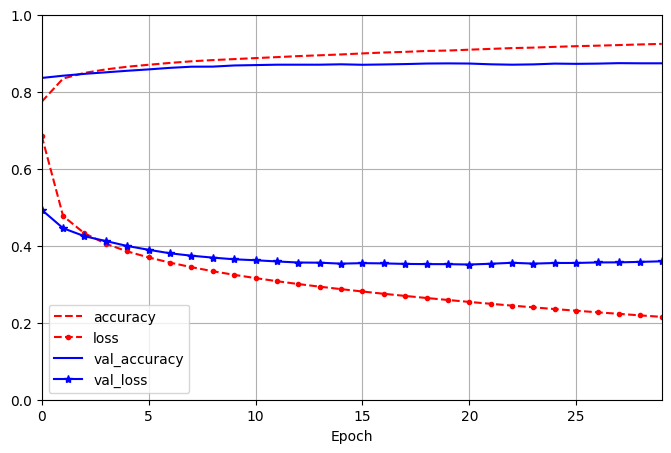

In [36]:
pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [37]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8735 - loss: 0.3693


[0.3664728105068207, 0.8734999895095825]

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.01, 0.  , 0.81],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
import numpy as np

In [40]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

In [42]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [45]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model=tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.1817 - loss: 1.4902 - val_RootMeanSquaredError: 1.2335 - val_loss: 1.5216
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6284 - loss: 0.3951 - val_RootMeanSquaredError: 1.2217 - val_loss: 1.4925
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6078 - loss: 0.3696 - val_RootMeanSquaredError: 1.5185 - val_loss: 2.3060
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5982 - loss: 0.3580 - val_RootMeanSquaredError: 1.3775 - val_loss: 1.8975
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5868 - loss: 0.3445 - val_RootMeanSquaredError: 0.8353 - val_loss: 0.6977
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5767 - loss: 0.3327 - val_RootMeanSquaredError: 1.0285 - val_loss: 1.0578
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5691 - loss: 0.3239 -

In [46]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [47]:
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized,hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [50]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [51]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [52]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [53]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                   validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide,X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.8065 - loss: 3.4228 - val_RootMeanSquaredError: 1.4208 - val_loss: 2.0188
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7907 - loss: 0.6267 - val_RootMeanSquaredError: 1.7146 - val_loss: 2.9398
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6908 - loss: 0.4773 - val_RootMeanSquaredError: 1.9312 - val_loss: 3.7296
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6623 - loss: 0.4387 - val_RootMeanSquaredError: 2.3552 - val_loss: 5.5471
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6561 - loss: 0.4307 - val_RootMeanSquaredError: 3.0790 - val_loss: 9.4803
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6563 - loss: 0.4310 - val_RootMeanSquaredError: 2.5618 - val_loss: 6.5628
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6472 - los

In [61]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
normal_1 = tf.keras.layers.Normalization()
normal_2 = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30, activation="relu")
hidden2 = tf.keras.layers.Dense(30, activation="relu")
norm1 = normal_1(input_wide)
norm2 = normal_2(input_deep)
hidden1 = hidden1(norm2)
hidden2 = hidden2(hidden1)
concat = tf.keras.layers.concatenate([norm1, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [64]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse","mse"), loss_weights=(0.9,0.1), optimizer=optimizer, metrics=(["RootMeanSquaredError"], ["RootMeanSquaredError"]))

In [65]:
normal_1.adapt(X_train_wide)
normal_2.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data = ((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - dense_31_RootMeanSquaredError: 1.4593 - dense_31_loss: 2.2551 - dense_32_RootMeanSquaredError: 1.7119 - dense_32_loss: 2.9934 - loss: 2.3289 - val_dense_31_RootMeanSquaredError: 1.3936 - val_dense_31_loss: 1.9414 - val_dense_32_RootMeanSquaredError: 2.4327 - val_dense_32_loss: 5.9153 - val_loss: 2.3398
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_31_RootMeanSquaredError: 0.7311 - dense_31_loss: 0.5352 - dense_32_RootMeanSquaredError: 0.9771 - dense_32_loss: 0.9561 - loss: 0.5773 - val_dense_31_RootMeanSquaredError: 0.8451 - val_dense_31_loss: 0.7139 - val_dense_32_RootMeanSquaredError: 1.7053 - val_dense_32_loss: 2.9068 - val_loss: 0.9336
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_31_RootMeanSquaredError: 0.6682 - dense_31_loss: 0.4467 - dense_32_RootMeanSquaredError: 0.7995 - dense_32_loss: 0.6394 - loss: 0.4660 - val_dense_31_RootMeanSquaredError: 0.6182 - val_dense_31_loss: 0.3820 - val_dense_32_Ro

In [66]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_31_RootMeanSquaredError: 0.5773 - dense_31_loss: 0.3334 - dense_32_RootMeanSquaredError: 0.6291 - dense_32_loss: 0.3959 - loss: 0.3396


In [68]:
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse

(0.334744930267334,
 0.3287336528301239,
 0.3875143229961395,
 0.5735158920288086,
 0.6222254633903503)

In [69]:
y_pred, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [70]:
#To make a dictionary from y_pred tuples
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [71]:
y_pred

{'dense_31': array([[0.3747533],
        [1.3537571],
        [3.4793496]], dtype=float32),
 'dense_32': array([[0.52719164],
        [1.1288885 ],
        [3.270312  ]], dtype=float32)}

In [72]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

In [74]:
#this gives us exact model we built using functional API as an instance of the WideAndDeepModel class.
model = WideAndDeepModel(30, activation="relu", name="my_model_subclass")

In [ ]:
#can choose the same optimizer as before and compile and train the model; don't forget .adapt() for normalization layers.
#model saving
model.save("my_keras_model", save_format="tf")

In [ ]:
#to load a saved model
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

### Callbacks
> checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)
> history = model.fit([...], callbacks[checkpoint_cb])


> early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
> history = model.fit([...], callbacks=[checkpoint_cb, early_stopping_cb])

In [77]:
#custom callbacks example
#on_train_begin(),on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), and on_batch_end()
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"]/logs["loss"]
        print(f"Epoch:{epoch}, val/train={ratio:.2f}")

In [78]:
from pathlib import Path
from time import strftime

In [79]:
def get_run_logdir(root_logdir = "my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [ ]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit([...], callbacks=[tensorboard_cb])

In [ ]:
#Optimization Pending